![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [223]:
import warnings
warnings.filterwarnings('ignore')

In [224]:
# Importación de librerías
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import statsmodels.api as sm

In [225]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [226]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [227]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [228]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


*Respuesta*
- "Season" es una variable categórica representada por 4 clases. De la celda 1.1 se puede inferir que un promedio de 116.34 bicicletas son alquiladas durante la estación correspondiente a la clase 1 (Invierno), 215.25 para la clase 2 (primavera), 234.41 para la clase 3 (Verano) y 198.98 para la clase 4 (Otoño).
- "hour" corresponde a la hora en la que es alquilada una bicicleta de las 24 horas del día (desde 0 hasta las 23). De la celda 1.2 se puede inferir el promedio de biciletas que son alquiladas a cada una de las horas del día, de un total de 10886 datos

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

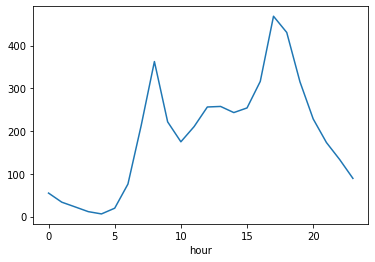

In [229]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

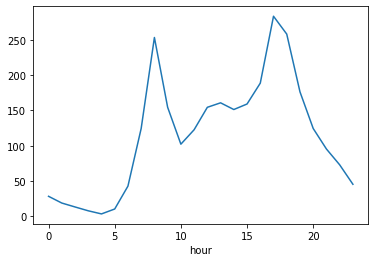

In [230]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
winter=bikes[bikes['season']==1]
winter.groupby('hour').total.mean().plot()

De la gráfica se infiere que durante el invierno las horas con más actividad fueron 7 y 17

<AxesSubplot:xlabel='hour'>

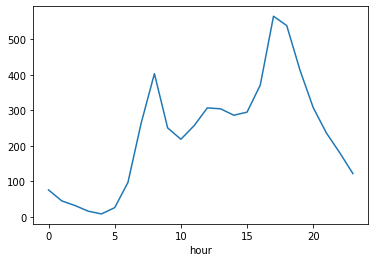

In [231]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
summer=bikes[bikes['season']==3]
summer.groupby('hour').total.mean().plot()

De la gráfica se infiere que durante el verano, la hora con más movimiento fue 18 con un total de 600 bicicletas aproximadamente.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [253]:
# Celda 3
y=bikes['total']
new=pd.get_dummies(bikes,columns=['season'])
x=new[['hour','season_1','season_2','season_4','season_4']]
XTotal=x
yTotal=y
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     782.5
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:14:53   Log-Likelihood:                -70669.
No. Observations:               10886   AIC:                         1.413e+05
Df Residuals:                   10881   BIC:                         1.414e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.0373      3.977     28.424      0.0

Del resultado de la regresión múltiple obtenemos un R2 de 0.223 el cual nos muestra falta de representación del modelo for lo que no tiene un buen ajuste. De las gráficas se puede observar que una regresión lineal no es la función que mejor se ajusdata al comportamiento de los datos, posiblemente un método de ensambalje serviría de manera más óptima para crear un modelo.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [239]:
# Celda 4
bbikes=bikes[['hour','season']]
feature_cols=bbikes.columns[bbikes.columns.str.startswith('C') == False]
feature_cols

# Separación de variables predictoras (X) y variable de interes (y)
X = bbikes[feature_cols]
y = bikes['total']

X.columns

Index(['hour', 'season'], dtype='object')

In [240]:
#Para la variable hour
j=0
# División de la variable Hits en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits
# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=5
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]



In [241]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

-138889.2339678902

In [242]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Ganancia de la variable 'hours' en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])

10610.413579790038

In [244]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de corte para hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, 5)
j, split, gain

# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

y.shape[0], y_l.shape[0], y_r.shape[0]

y.mean(), y_l.mean(), y_r.mean()

(191.57413191254824, 55.437673900946024, 258.6715578716402)

In [246]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=10, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': [0, 2.0],
    'n_samples': 2684,
    'gain': 382.8088308604629,
    'sl': {'y_pred': 1,
     'y_prob': 44.41383095499451,
     'level': 4,
     'split': [1, 2.0],
     'n_samples': 909,
     'gain': 291.4004681825131,
     'sl': {'y_pred': 1,
      'y_prob': 23.32456140350877,
      'level': 5,
      'split': [0, 1.0],
      'n_samples': 226,
      'gain': 45.41972746495435,
      'sl': {'y_pred': 1,
       'y_prob': 27.808695652173913,
       'level': 6,
       'split': -1,
       'n_samples': 113,
 

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

0.23019642455372347

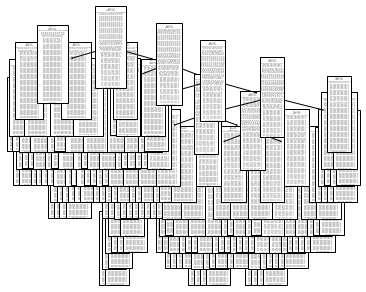

In [272]:
# Celda 5

#arbol
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion='gini',max_depth=20)
clf=clf.fit(X,y)
y_predi=clf.predict(X)
tree.plot_tree(clf)
#Metricas de evaluación accuracy y F1 respectivamente
metrics.r2_score(y,y_predi)


De los resultados de R2, se puede concluir que el modelo de árbol de decisión es un poco mejor que la regresión. Aunque igual el valor de R2 sigue siendo muy bajo. Se deberían evaluar el resto de las varaibles para identificar cuáles son las que idealmente deberían ir dentro del modelo: Evaluando multi colinealidad y dependencia de respuesta de la variable Y.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [ ]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [ ]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [ ]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 6
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#Regresión logisitica:
clf= LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred=clf.predict(X_test)
#Metricas de evaluación accuracy y F1 respectivamente
from sklearn.metrics import f1_score
acc=metrics.accuracy_score(y_pred, y_test)
f1=f1_score(y_pred,y_test)
rlog=(acc,f1)

[Text(0.484375, 0.9285714285714286, 'X[26] <= 3140.206\ngini = 0.5\nsamples = 6000\nvalue = [3000, 3000]'),
 Text(0.23102678571428573, 0.7857142857142857, 'X[40] <= 0.605\ngini = 0.464\nsamples = 3047\nvalue = [1931, 1116]'),
 Text(0.12276785714285714, 0.6428571428571429, 'X[25] <= 3573.963\ngini = 0.481\nsamples = 2426\nvalue = [1449, 977]'),
 Text(0.06696428571428571, 0.5, 'X[23] <= 290054.172\ngini = 0.431\nsamples = 875\nvalue = [600, 275]'),
 Text(0.03571428571428571, 0.35714285714285715, 'X[2] <= 1601.5\ngini = 0.456\nsamples = 695\nvalue = [451, 244]'),
 Text(0.017857142857142856, 0.21428571428571427, 'X[41] <= 0.866\ngini = 0.447\nsamples = 670\nvalue = [444, 226]'),
 Text(0.008928571428571428, 0.07142857142857142, 'gini = 0.441\nsamples = 654\nvalue = [439, 215]'),
 Text(0.026785714285714284, 0.07142857142857142, 'gini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.05357142857142857, 0.21428571428571427, 'X[48] <= 0.38\ngini = 0.403\nsamples = 25\nvalue = [7, 18]'),
 Text(0.

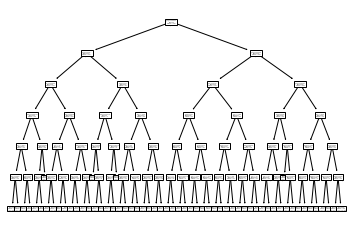

In [ ]:
#arbol
from sklearn import tree
clf1=tree.DecisionTreeClassifier(criterion='gini',max_depth=6)
clf1=clf1.fit(X,y)

tree.plot_tree(clf1)

In [ ]:
acc=clf1.score(X_test,y_test)
y_pred1=clf1.predict(X_test)
f1=f1_score(y_pred1,y_test)
arbol=(acc,f1)
arbol

(0.6966666666666667, 0.7092651757188498)

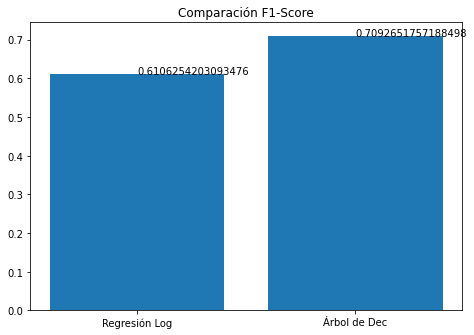

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación F1-Score")
ejeX = ['Regresión Log', 'Árbol de Dec']
ejeY = [rlog[1],arbol[1]]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

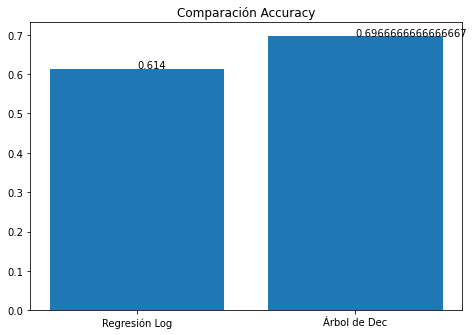

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Accuracy")
ejeX = ['Regresión Log', 'Árbol de Dec']
ejeY = [rlog[0],arbol[0]]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

En este caso, el árbol de decisión si es el modelo más óptimo. Al cambiar el valor de profundidad del árbol también cambia su puntaje de evaluación por lo que es posible aumentar su calidad.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [ ]:
# Celda 7
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier

#EScenario 1: 100 árboles de decisión donde max_depth tome un valor de su elección
clf3 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=50), n_estimators=100 ,bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
e1=(metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))
e1

(0.642384105960265, 0.64)

In [ ]:
#Escenario 2: 100 árboles de decisión donde min_samples_leaf tome un valor de su elección
clf4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10), n_estimators=100 ,bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)
e2=(metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))
e2

(0.6596306068601584, 0.656)

In [ ]:
#EScenario 3: 100 regresiones logísticas
clf5 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100 ,bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf5.fit(X_train, y_train)
y_pred = clf5.predict(X_test)
e3=(metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))
e3

(0.6136210384356034, 0.618)

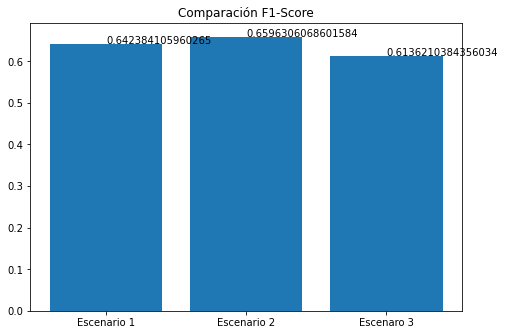

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación F1-Score")
ejeX = ['Escenario 1', 'Escenario 2','Escenaro 3']
ejeY = [e1[0],e2[0],e3[0]]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

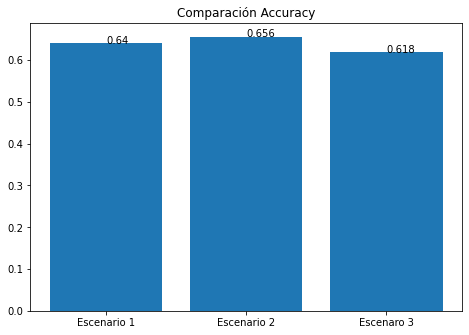

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Accuracy")
ejeX = ['Escenario 1', 'Escenario 2','Escenaro 3']
ejeY = [e1[1],e2[1],e3[1]]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Del análisis de los gráficos presentados anteriormente, el escenario #2 de votación mayoritaria es que el presenta resultados más optimos con un F1-score y accuracy de 0.65

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8


#EScenario 1: 100 árboles de decisión donde max_depth tome un valor de su elección
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf3.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf3.n_estimators))

for i in range(clf3.n_estimators):
    oob_sample = ~clf3.estimators_samples_[i]
    y_pred_ = clf3.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf3.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
# Desempeño al hacer votación ponderada
ep1=(metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))
ep1

(0.6513761467889909, 0.6453333333333333)

In [ ]:
#Escenario 2: 100 árboles de decisión donde min_samples_leaf tome un valor de su elección
errors = np.zeros(clf4.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf4.n_estimators))

for i in range(clf4.n_estimators):
    oob_sample = ~clf4.estimators_samples_[i]
    y_pred_ = clf4.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf4.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
# Desempeño al hacer votación ponderada
ep2=(metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))
ep2

(0.6523201075991929, 0.6553333333333333)

In [ ]:
#EScenario 3: 100 regresiones logísticas
errors = np.zeros(clf5.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf5.n_estimators))

for i in range(clf5.n_estimators):
    oob_sample = ~clf5.estimators_samples_[i]
    y_pred_ = clf5.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf5.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
# Desempeño al hacer votación ponderada
ep3=(metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))
ep3

(0.6153846153846154, 0.62)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

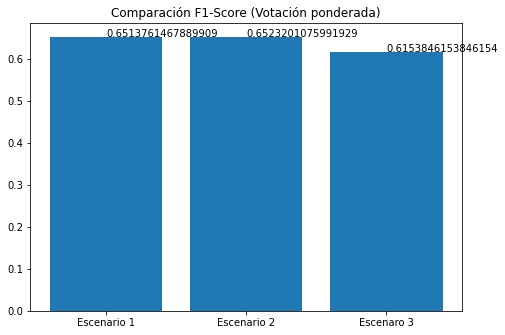

In [ ]:
# Celda 9

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación F1-Score (Votación ponderada)")
ejeX = ['Escenario 1', 'Escenario 2','Escenaro 3']
ejeY = [ep1[0],ep2[0],ep3[0]]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

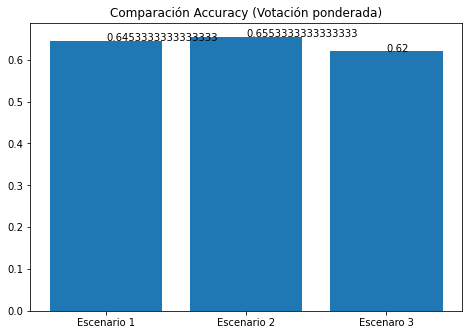

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Accuracy (Votación ponderada)")
ejeX = ['Escenario 1', 'Escenario 2','Escenaro 3']
ejeY = [ep1[1],ep2[1],ep3[1]]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Podemos ver de las gráficas, que en el caso de Votación ponderada el desempeño del escenario 1 aumenta en muy pequeña proporción. La votación ponderada da más importancia a modelos cuya predicción es muy buena, por lo que probablemente pueden revaluarse las condiciones que se pusieron al inicio de la evaluación para que aumenten su accuracy o F1.